# MoGP for Alternate Clinical Metrics
**Tables/Figures**: Figure 6
This notebook includes analysis for MoGP models trained on Forced Vital Capacity Percentages (FVCP), and ALSFRS-R Subscores (Fine Motor, Gross Motor, Bulbar, and Respiratory domains)

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

In [2]:
from analysis_utils import *
import joblib
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
# Formatting params
col_palette = ['#176D9C', '#DBA137','#86AF49' ,'#df473c','#ae3c60', '#82b4bb']
parameters = {'axes.labelsize': 25,
              'xtick.labelsize':15,
              'ytick.labelsize':25,
             'legend.fontsize':25,
              'legend.loc':'upper right',
              'xtick.labelsize':25,
              'ytick.labelsize':25,
             'pdf.fonttype':42, 
             'ps.fonttype':42, 
             'font.family':'arial'}
plt.rcParams.update(parameters)

In [4]:
def format_mogp_outcomes(ax, name, data, max_x, y_label, y_minmax_norm, y_title, x_title='Time from Onset (Years)'):
    """Format plot for alternate outcomes"""
    ax = format_mogp_axs(ax, max_x=max_x, y_label=y_label, y_minmax=y_minmax_norm)
    ax.set_ylabel(y_title)
    ax.set_xlabel(x_title)
    
    handles, labels = ax.get_legend_handles_labels()
    handles = [(x, matplotlib.patches.Patch(color=x.get_color(), alpha=0.25, linewidth=0)) for x in handles]
    
    if name == 'fvcp':
        ax.legend(handles=handles, labels=labels, frameon=False, 
              ncol=1, fontsize=25, columnspacing=1, handletextpad=0.5, loc='lower left')
    else:
        ax.legend(handles=handles, labels=labels, frameon=False, loc='lower left', bbox_to_anchor=(-0.05, 0.95), 
                  ncol=5, columnspacing=1, handletextpad=0.3, fontsize=15, handlelength=0.5)
    return ax

In [5]:
# Select best MAP seed for each
cur_proj = 'proact'

exp_path = Path('data/model_data/4_proact_alt_endpoints')
mod_res_path = exp_path / 'results' / 'rbf'

# # Load FVCP
fvcp_data = joblib.load(exp_path / 'data_proact_min3_fvcpmax.pkl')
fvcp_map_mod = get_map_model(mod_res_path, 'model_{}_min3_fvcpmax'.format(cur_proj), thresh=25, num_obs=10)

# # Load Subscore
subdom_model_dict = {}
subdom_data_dict = {}
for subscore in ['fine', 'gross', 'bulb', 'resp']:
    subdom_data_dict[subscore] = joblib.load(exp_path / 'data_{}_min3_alsfrst_{}.pkl'.format(cur_proj, subscore))
    subdom_model_dict[subscore] = get_map_model(mod_res_path, 'model_{}_min3_alsfrst_{}'.format(cur_proj, subscore)) 

seed did not pass monotonicity test: 1
seed did not pass monotonicity test: 2
best seed: 4, ll -8369.37186704322
best seed: 2, ll -5672.966960531453
best seed: 0, ll -6629.446824611956
best seed: 2, ll -8968.255410640544
best seed: 3, ll -14771.259048867993


In [8]:
# # Save for source data
# joblib.dump(fvcp_map_mod, 'reports/fvcp_map_mod.pkl')
# joblib.dump(subdom_model_dict, 'reports/subdom_model_dict.pkl')

['reports/fvcp_map_mod.pkl']

['reports/subdom_model_dict.pkl']

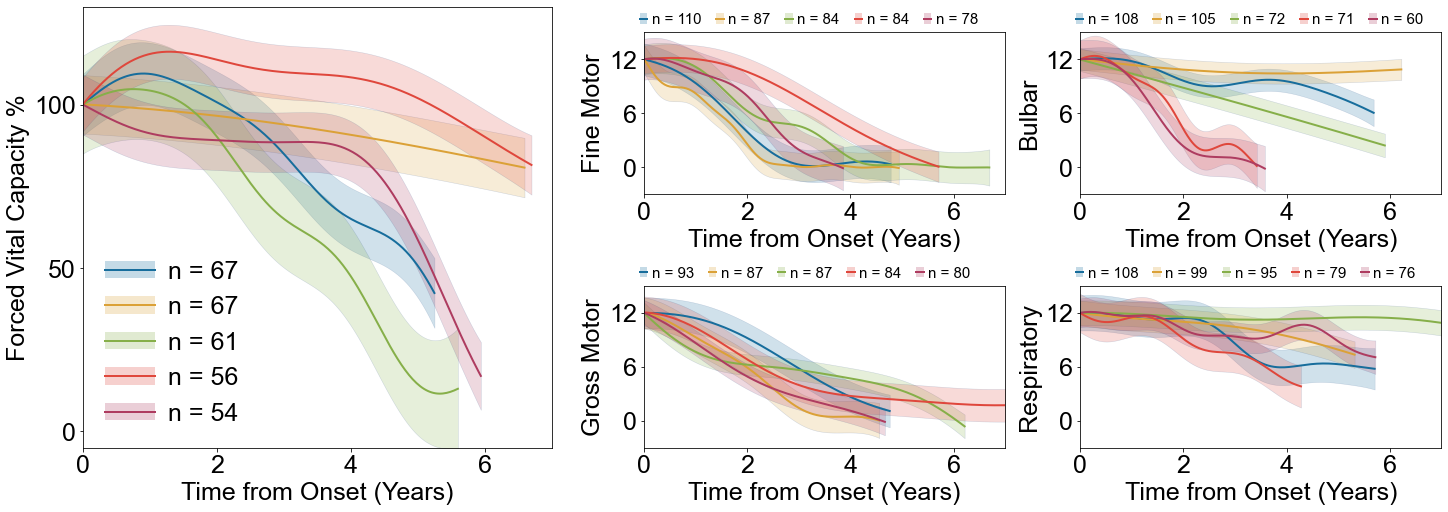

In [6]:
# Plot figure
fig = plt.figure(figsize=(20,7), constrained_layout=True)
gs = fig.add_gridspec(3, 4, width_ratios=[1.3, 0.01, 1, 1])
f_ax1 = fig.add_subplot(gs[:, 0])
f_ax2 = fig.add_subplot(gs[1,2])
f_ax3 = fig.add_subplot(gs[2, 2])
f_ax4 = fig.add_subplot(gs[1, 3])
f_ax5 = fig.add_subplot(gs[2, 3])

cur_disp_clust=5
f_ax1 = plot_largest_mogp_clusters(f_ax1, fvcp_map_mod, fvcp_data, cur_disp_clust, color_palette=col_palette, data_flag=False, gpy_pad=0)
f_ax1 = format_mogp_outcomes(f_ax1, 'fvcp', fvcp_data, max_x=7, y_label=(0,50,100), y_minmax_norm = (-5, 130), y_title='Forced Vital Capacity %', x_title='Time from Onset (Years)')

f_ax2 = plot_largest_mogp_clusters(f_ax2, subdom_model_dict['fine'], subdom_data_dict['fine'], cur_disp_clust, color_palette=col_palette, data_flag=False, gpy_pad=0)
f_ax2 = format_mogp_outcomes(f_ax2, 'fine', subdom_data_dict['fine'], max_x=7, y_label=(0,6,12), y_minmax_norm = (-3, 15), y_title='Fine Motor', x_title='Time from Onset (Years)')

f_ax3 = plot_largest_mogp_clusters(f_ax3, subdom_model_dict['gross'], subdom_data_dict['gross'], cur_disp_clust, color_palette=col_palette, data_flag=False, gpy_pad=0)
f_ax3 = format_mogp_outcomes(f_ax3, 'gross', subdom_data_dict['gross'], max_x=7, y_label=(0,6,12), y_minmax_norm = (-3, 15), y_title='Gross Motor', x_title='Time from Onset (Years)')

f_ax4 = plot_largest_mogp_clusters(f_ax4, subdom_model_dict['bulb'], subdom_data_dict['bulb'], cur_disp_clust, color_palette=col_palette, data_flag=False, gpy_pad=0)
f_ax4 = format_mogp_outcomes(f_ax4, 'bulb', subdom_data_dict['bulb'], max_x=7, y_label=(0,6,12), y_minmax_norm = (-3, 15), y_title='Bulbar', x_title='Time from Onset (Years)')

f_ax5 = plot_largest_mogp_clusters(f_ax5, subdom_model_dict['resp'], subdom_data_dict['resp'], cur_disp_clust, color_palette=col_palette, data_flag=False, gpy_pad=0)
f_ax5 = format_mogp_outcomes(f_ax5, 'resp', subdom_data_dict['resp'], max_x=7, y_label=(0,6,12), y_minmax_norm = (-3, 15), y_title='Respiratory', x_title='Time from Onset (Years)')

# Save figure
fig.savefig('reports/fig_6_alt_outcomes.pdf', bbox_inches='tight')
